Use dataset from this link - https://drive.google.com/file/d/1tPRc-tFfBtEf6v9F3PFBrrLRMP6Vr6n7/view?usp=share_link

Exploring and manipulating the data
Task 1

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

filename = "/Users/harshitlakum/Desktop/mu_vs_z.txt"
data_full = pd.read_csv(filename, sep='\s+')

print(data_full.columns)


Index(['Supernova', 'Redshift', 'Modulus', 'Error', 'LMGProb'], dtype='object')


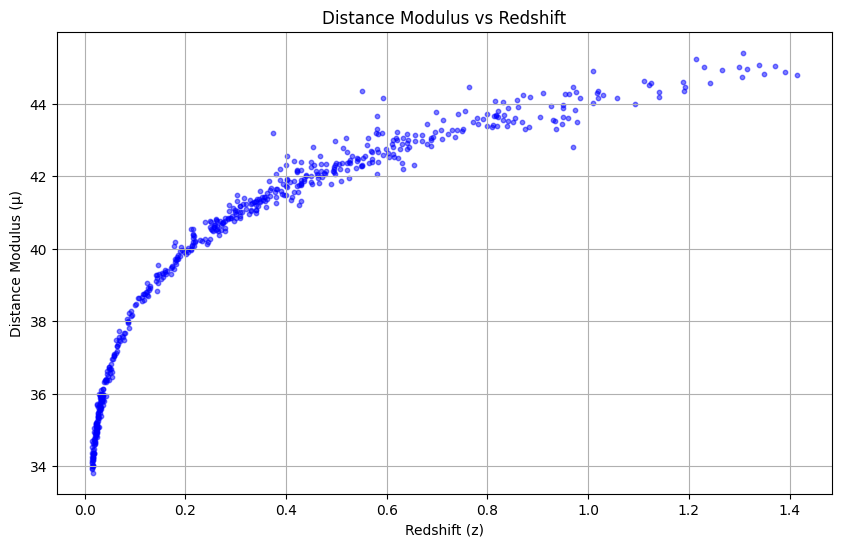

In [19]:
# Plot distance modulus (μ) as a function of redshift (z)
plt.figure(figsize=(10, 6))
plt.scatter(data_full['Redshift'], data_full['Modulus'], s=10, c='blue', alpha=0.5)
plt.title('Distance Modulus vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.grid(True)
plt.show()

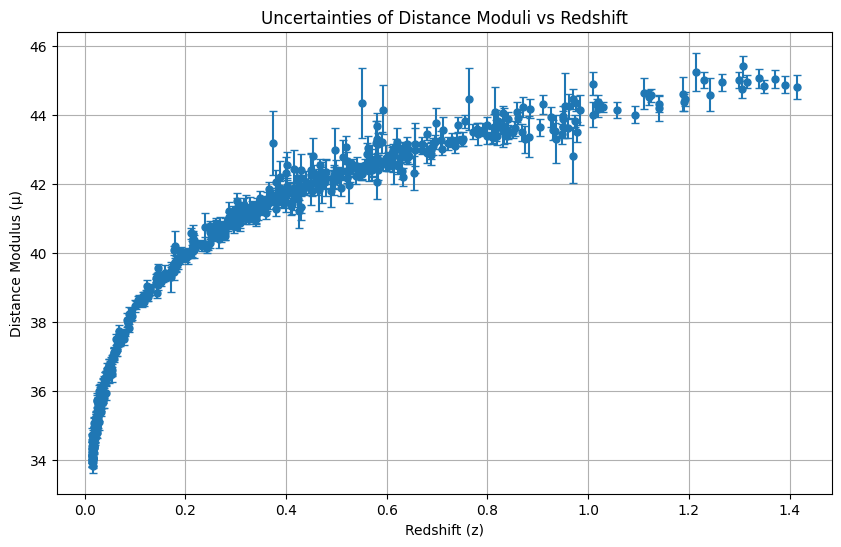

In [20]:
# Plot uncertainties of distance moduli (σμ) as a function of redshift (z)
plt.figure(figsize=(10, 6))
plt.errorbar(data_full['Redshift'], data_full['Modulus'], yerr=data_full['Error'], fmt='o', markersize=5, capsize=3)
plt.title('Uncertainties of Distance Moduli vs Redshift')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance Modulus (μ)')
plt.grid(True)
plt.show()

Taks 2:
 At redshifts z ≤ 0.1.
plot of distance d vs. redshift z

In [21]:
nearby_data = data_full[data_full['Redshift'] <= 0.1]

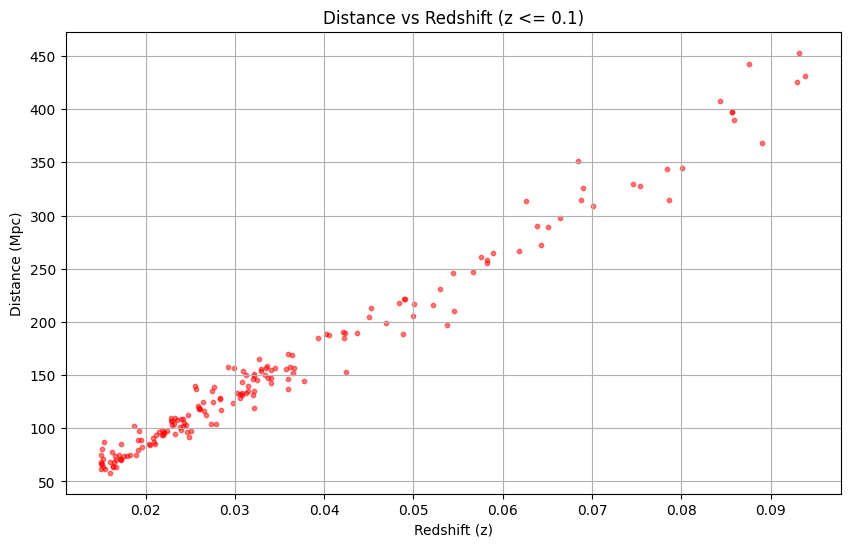

In [22]:

# Filter the data to include only nearby supernovae with z <= 0.1
nearby_data = data_full[data_full['Redshift'] <= 0.1].copy()

# Convert distance modulus (μ) to distance (d) in Megaparsec (Mpc)
nearby_data.loc[:, 'Distance_Mpc'] = 10 ** ((nearby_data['Modulus'] / 5) + 1) / 10**6

# Plot distance (d) vs redshift (z)
plt.figure(figsize=(10, 6))
plt.scatter(nearby_data['Redshift'], nearby_data['Distance_Mpc'], s=10, c='red', alpha=0.5)
plt.title('Distance vs Redshift (z <= 0.1)')
plt.xlabel('Redshift (z)')
plt.ylabel('Distance (Mpc)')
plt.grid(True)
plt.show()



Task 3 
the redshifts to recessional velocities, and plot the distance d as a function of recessional velocity v.

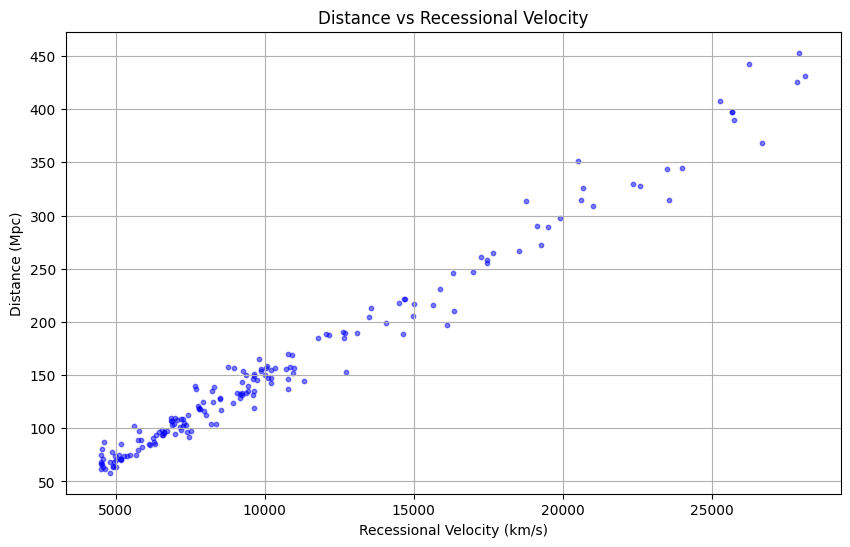

In [23]:
# Constants
speed_of_light = 299792.458  # Speed of light in km/s

# Filter the data to include only nearby supernovae with z <= 0.1
nearby_data = data_full[data_full['Redshift'] <= 0.1].copy()


# Convert redshifts (z) to recessional velocities (v) using the formula v = z * c
nearby_data['Recessional_Velocity'] = nearby_data['Redshift'] * speed_of_light

# Convert distance modulus (μ) to distance (d) in Megaparsec (Mpc)
nearby_data['Distance_Mpc'] = 10 ** ((nearby_data['Modulus'] / 5) + 1) / 10**6

# Plot distance (d) as a function of recessional velocity (v)
plt.figure(figsize=(10, 6))
plt.scatter(nearby_data['Recessional_Velocity'], nearby_data['Distance_Mpc'], s=10, c='blue', alpha=0.5)
plt.title('Distance vs Recessional Velocity')
plt.xlabel('Recessional Velocity (km/s)')
plt.ylabel('Distance (Mpc)')
plt.grid(True)
plt.show()

Determining the Hubble constant from nearby supernovae
Task 1 Least-square estimate 

Here we take “y”-variable as distances and "x"-variable as recessional_velocities
and founded hubble constant and hubble time

In [138]:

# Example data (you should replace these with your actual data arrays)
distances = nearby_data['Distance_Mpc']  # distances to the supernovae in Mpc
recessional_velocities = nearby_data['Recessional_Velocity']  # recessional velocities in km/s

# Perform linear least-squares regression to find the Hubble constant
slope, intercept = np.polyfit(recessional_velocities, distances, 1)

# The slope is an estimate of the Hubble constant H0
hubble_constant = slope
t_H = 1 / slope
print("Estimated Hubble Constant H0: {:.2f} km/s/Mpc".format(hubble_constant))

# Constants
speed_of_light = 299792.458  # speed of light in km/s
Mpc_to_km = 3.086e19  # kilometers in a megaparsec
seconds_per_year = 31.5576e6  # seconds in a year

# Convert t_H from Mpc/(km/s) to years
t_H_years = t_H * Mpc_to_km / speed_of_light / seconds_per_year

print("t_H in years:", t_H_years)

Estimated Hubble Constant H0: 0.02 km/s/Mpc
t_H in years: 214725457.524687


Task 2,3
obtaining uncertainties 
Maximum likelihood estimate least-square estimate


In [203]:


# Assume you have 'distance_moduli' and 'moduli_uncertainties' from your data
mu = nearby_data['Modulus']  # distance moduli
sigma_mu = nearby_data['Error']  # uncertainties in distance moduli

# Calculate distances and their uncertainties
d = 10 ** ((mu + 5) / 5) / 1e6  # convert distance to Mpc
d_prime = d * np.log(10) / 5
sigma_d = d_prime * sigma_mu  # uncertainty in distance

# Assuming 'recessional_velocities' are the recessional velocities corresponding to these distances
v = nearby_data['Recessional_Velocity']

# Perform weighted linear least-squares regression
# Weights are the inverse of the variance (sigma_d squared)
weights = 1 / sigma_d**2
slope, intercept = np.polyfit(v, d, 1, w=weights)

# The slope is an estimate of the Hubble constant H0
hubble_constant = slope
t_H = 1 / slope
print("Estimated Hubble Constant H0: {:.2f} km/s/Mpc".format(hubble_constant))

# Constants
speed_of_light = 299792.458  # speed of light in km/s
Mpc_to_km = 3.086e19  # kilometers in a megaparsec
seconds_per_year = 31.5576e6  # seconds in a year

# Convert t_H from Mpc/(km/s) to years
t_H_years = t_H * Mpc_to_km / speed_of_light / seconds_per_year

print("t_H in years:", t_H_years)
print("Distances (Mpc):", d)
print("Uncertainties in Distances (Mpc):", sigma_d)


Estimated Hubble Constant H0: 0.02 km/s/Mpc
t_H in years: 217454853.85350984
Distances (Mpc): 0      117.305042
1      217.006920
2      230.960787
3      308.565458
4      313.820905
          ...    
252    298.140524
265    367.866793
271    453.088193
274    396.970599
282    425.761128
Name: Modulus, Length: 175, dtype: float64
Uncertainties in Distances (Mpc): 0      12.095615
1      16.672105
2      16.566413
3      22.518095
4      22.559470
         ...    
252    16.143921
265    19.894148
271    23.881344
274    21.566524
282    23.322625
Length: 175, dtype: float64


 Task 4 
 Plot again the distances d as a function of the recessional velocity v

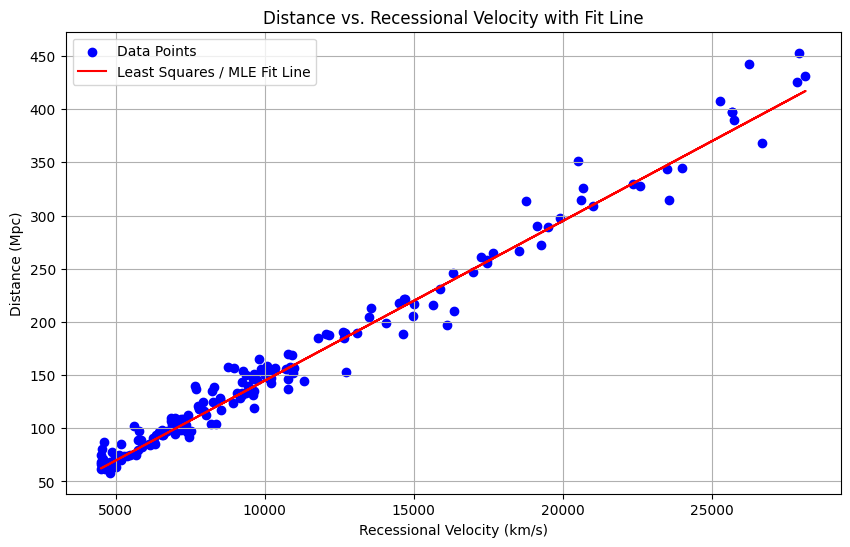

In [204]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(v, d, color='blue', label='Data Points')
plt.title('Distance vs. Recessional Velocity with Fit Line')
plt.xlabel('Recessional Velocity (km/s)')
plt.ylabel('Distance (Mpc)')

# Add the least squares / maximum likelihood fit line
fit_line = slope * v + intercept
plt.plot(v, fit_line, 'r-', label='Least Squares / MLE Fit Line')

# Legends and grid
plt.legend()
plt.grid(True)
plt.show()

Considering all supernovae and determining the age of the Universe

Task 1 
Polynomial regression (not only those with z ≤ 0.1)

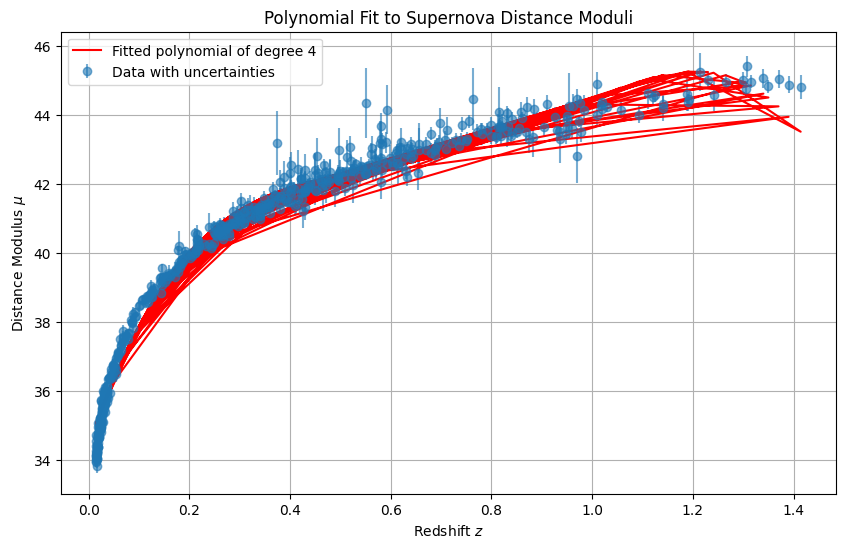

In [205]:
def polynomial_model(z, theta0, theta1, theta2, theta3, theta4):
    return theta0 + theta1*z + theta2*z**2 + theta3*z**3 + theta4*z**4


# Weighted least squares fitting
popt, pcov = curve_fit(polynomial_model, data_full['Redshift'], data_full['Modulus'], sigma=data_full['Error'], absolute_sigma=True)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.errorbar(data_full['Redshift'], data_full['Modulus'], yerr=data_full['Error'], fmt='o', label='Data with uncertainties', alpha=0.6)
plt.plot(data_full['Redshift'], polynomial_model(data_full['Redshift'], *popt), 'r-', label='Fitted polynomial of degree 4')
plt.xlabel('Redshift $z$')
plt.ylabel('Distance Modulus $\\mu$')
plt.title('Polynomial Fit to Supernova Distance Moduli')
plt.legend()
plt.grid(True)
plt.show()


For saying model is good or not we founded R-squared and Mean squared Error 

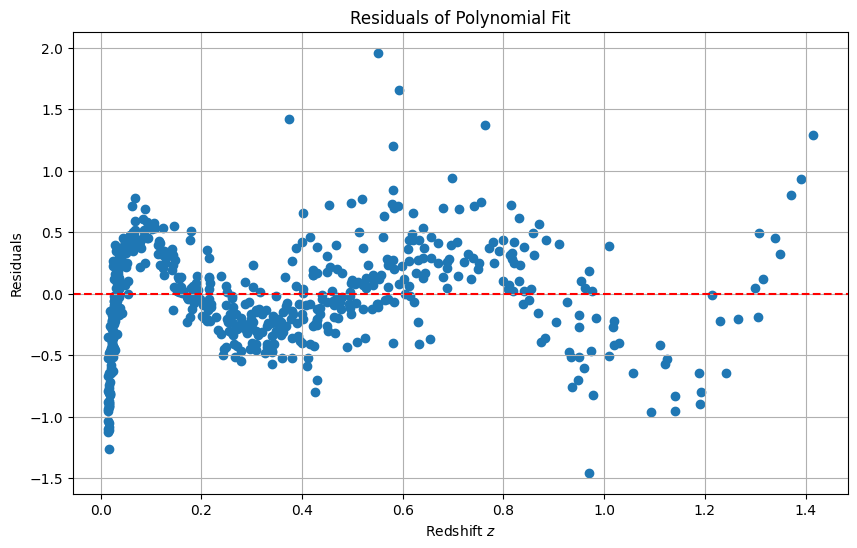

R-squared: 0.9825333960149762
Mean Squared Error: 0.17805837987408507


In [206]:
# Calculate predictions and residuals
mu_pred = polynomial_model(data_full['Redshift'], *popt)
residuals = data_full['Modulus'] - mu_pred

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(data_full['Redshift'], residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Redshift $z$')
plt.ylabel('Residuals')
plt.title('Residuals of Polynomial Fit')
plt.grid(True)
plt.show()

# Calculating R-squared
r_squared = r2_score(data_full['Modulus'], mu_pred)
print("R-squared:", r_squared)

# Calculating Mean Squared Error
mse = mean_squared_error(data_full['Modulus'], mu_pred)
print("Mean Squared Error:", mse)

Based on,
 R-squared: 0.9825 indicates that this model explains about 98.25% of the variance in your data, which is excellent.

 Mean Squared Error: 0.178 suggests that the average squared difference between the predicted and actual values is low, which generally indicates good model performance.

Task 2 
Cosmological regression

(a) Convert the uncertainties

In [215]:
# Assume you have 'distance_moduli' and 'moduli_uncertainties' from your data
mu = data_full['Modulus']  # distance moduli
sigma_mu = data_full['Error']  # uncertainties in distance moduli


d = 10 ** ((mu + 5) / 5) /  1e6 
d_prime = d * np.log(10) / 5
sigma_d_1 = d_prime * sigma_mu  # uncertainty in distance
sigma_d = sigma_d_1 /  1e6 
print("Distances :", d)
print("Uncertainties in Distances :", sigma_d)




Distances : 0        117.305042
1        217.006920
2        230.960787
3        308.565458
4        313.820905
           ...     
575     7224.273081
576     9868.963776
577     5347.955161
578    11202.222383
579     3183.499599
Name: Modulus, Length: 580, dtype: float64
Uncertainties in Distances : 0      0.000012
1      0.000017
2      0.000017
3      0.000023
4      0.000023
         ...   
575    0.000569
576    0.000852
577    0.000478
578    0.002891
579    0.000354
Length: 580, dtype: float64


(b) Build the feature matrix

In [223]:
from scipy.integrate import quad

# Constants
c = 299792.458  # speed of light in km/s
z = data_full['Redshift']
# Cosmological parameters (example values from Planck Collaboration)
Omega_m = 0.315
Omega_Lambda = 0.685

# Define E(z)
def E(z, Omega_m, Omega_Lambda):
    return np.sqrt(Omega_Lambda + Omega_m * (1 + z)**3)

# Integral function for d(z; t_H) without t_H factor
def integral_d(z, Omega_m, Omega_Lambda):
    integral_value, _ = quad(lambda z_prime: 1 / E(z_prime, Omega_m, Omega_Lambda), 0, z)
    return integral_value



# Build feature matrix Φ
Phi = np.array([(1 + z) * c * integral_d(z, Omega_m, Omega_Lambda) for z in data_full['Redshift']]).reshape(-1, 1)

# Display part of the feature matrix
print("Feature Matrix Φ (sample values):")
print(Phi[:5])  # Display first 5 entries

Feature Matrix Φ (sample values):
[[ 8724.3570998 ]
 [15565.35164324]
 [16495.69413221]
 [22106.97779196]
 [19665.88481703]]


(c) Build the precision matrix

In [230]:

# Build the precision matrix C^-1
C_inv = np.diag(1 / sigma_d**2)

# Display the precision matrix
print("Precision Matrix C^-1:")
print(C_inv)

Precision Matrix C^-1:
[[6.83508738e+09 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.59765195e+09 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.64370353e+09 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.37994648e+06
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.19682861e+05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.98221228e+06]]


(d)Find the maximum likelihood estimate for tH

In [258]:

# Calculate the weighted least squares estimate of t_H
t_H_est = np.linalg.inv(Phi.T @ C_inv @ Phi) @ (Phi.T @ C_inv @ d)
t_H =  t_H_est 

# The slope is an estimate of the Hubble constant H0
hubble_constant = 1 / t_H
print("Estimated Hubble Constant :", format(hubble_constant))


# Constants
speed_of_light = 299792.458  # speed of light in km/s
Mpc_to_km = 3.086e19  # kilometers in a megaparsec
seconds_per_year = 31.5576e6  # seconds in a year

# Convert t_H from Mpc/(km/s) to years
t_H_years = t_H * Mpc_to_km / speed_of_light / seconds_per_year

print("t_H in years:", t_H_years)

Estimated Hubble Constant : [70.15549023]
t_H in years: [46495.35714329]


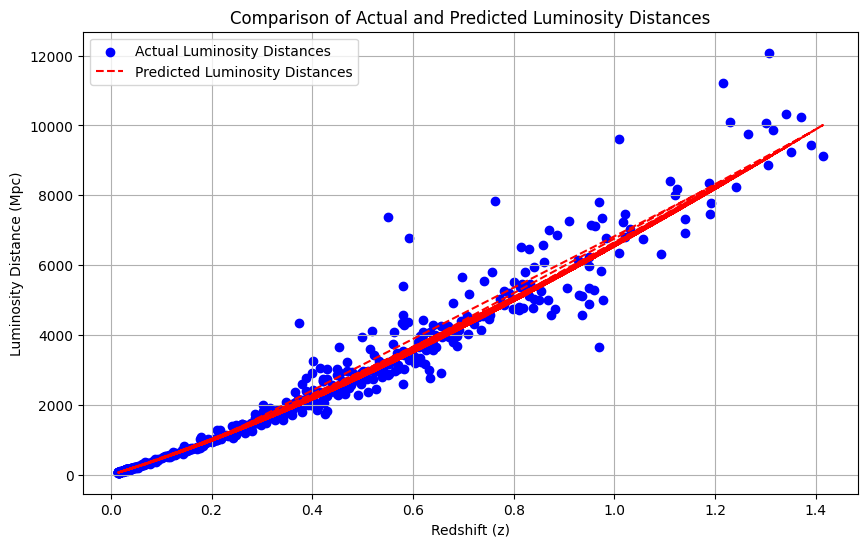

In [263]:
# Calculate predicted luminosity distances using the estimated t_H
d_pred = Phi @ t_H_est  # matrix multiplication to predict d

# Plotting the actual and predicted data
plt.figure(figsize=(10, 6))
plt.scatter(z, d, color='blue', label='Actual Luminosity Distances')
plt.plot(z, d_pred, color='red', label='Predicted Luminosity Distances', linestyle='--')
plt.xlabel('Redshift (z)')
plt.ylabel('Luminosity Distance (Mpc)')
plt.title('Comparison of Actual and Predicted Luminosity Distances')
plt.legend()
plt.grid(True)
plt.show()

Based on given graph we can say model performing quite well

Task 3 Age of the Universe

In [267]:
# Integration function for the age of the universe
def age_of_universe_integral(z, Omega_m, Omega_Lambda):
    integrand = lambda z: 1 / ((1 + z) * E(z, Omega_m, Omega_Lambda))
    age, error = quad(integrand, z, np.infty)  # Integration from z to infinity
    return age

In [270]:
# Compute the current age of the universe at z = 0
current_age_of_universe = t_H_years * age_of_universe_integral(0, Omega_m, Omega_Lambda)



# Display the result
print("Current age of the Universe (at z=0):", current_age_of_universe, "years")

Current age of the Universe (at z=0): 44188842765.320076 years
